## Machine learning project 
## By Ravendrika Mahapatra
## Wine Prediction Model 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline


# Load the data

In [4]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Preprocessing and Data Visualization

In [5]:
df.shape

(1599, 12)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

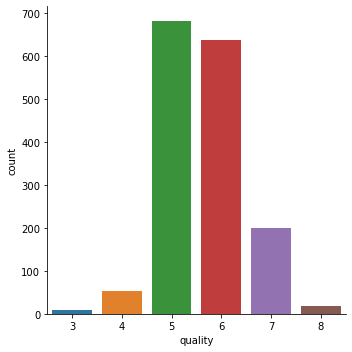

In [12]:
sns.catplot(x = 'quality',data=df,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

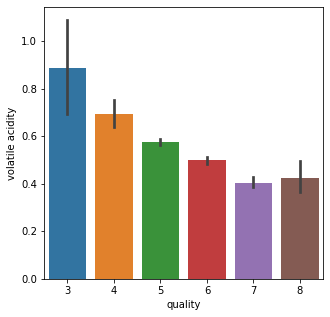

In [20]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x ='quality',y ='volatile acidity',data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

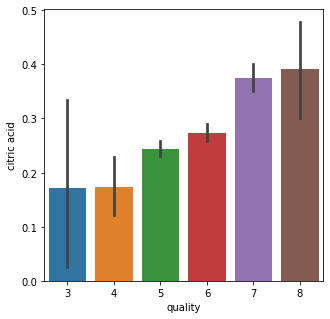

In [19]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x ='quality',y ='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

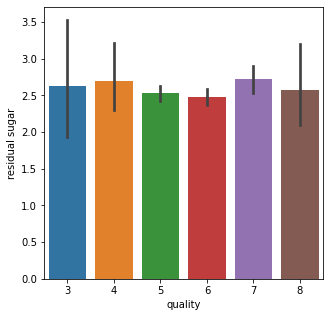

In [54]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x ='quality',y='residual sugar',data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

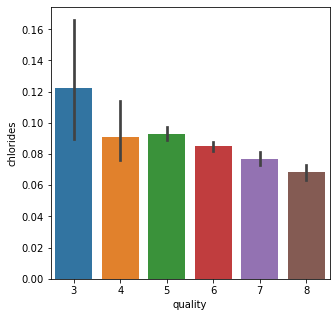

In [56]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'chlorides',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

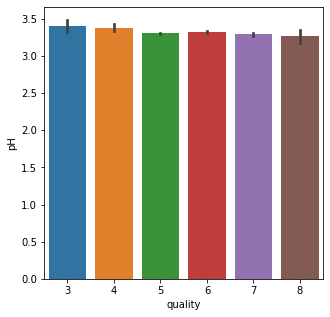

In [57]:
plot = plt.figure(figsize =(5,5))
sns.barplot(x='quality', y='pH',data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

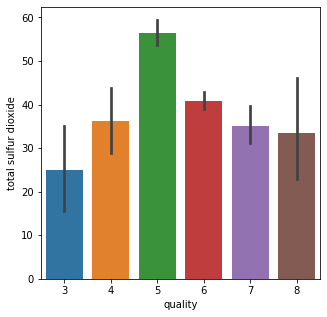

In [58]:
plot = plt.figure(figsize =(5,5))
sns.barplot(x='quality', y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

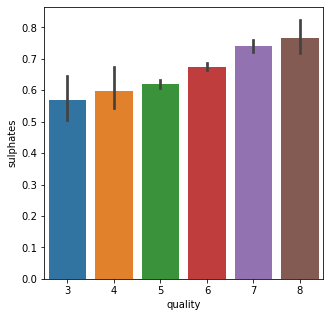

In [59]:
plot = plt.figure(figsize =(5,5))
sns.barplot(x='quality', y='sulphates',data=df)

# Data Correlation
## Positive Correlation
## Negative Correlation

In [21]:
correlation= df.corr()

<AxesSubplot:>

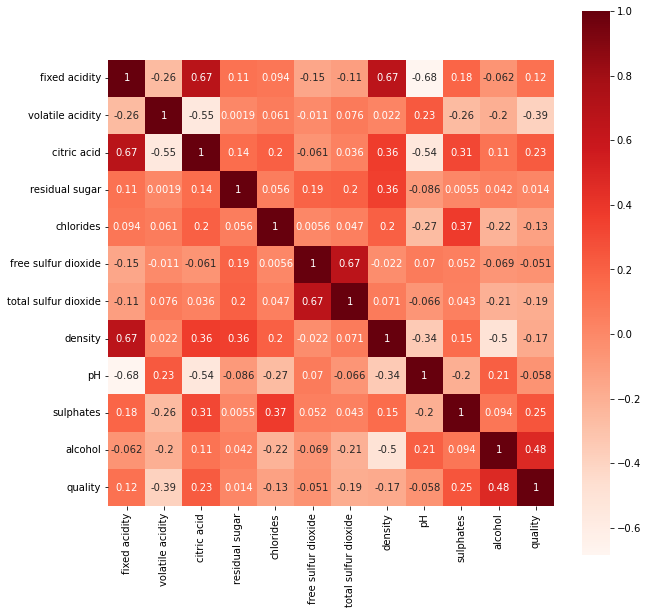

In [28]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Reds')

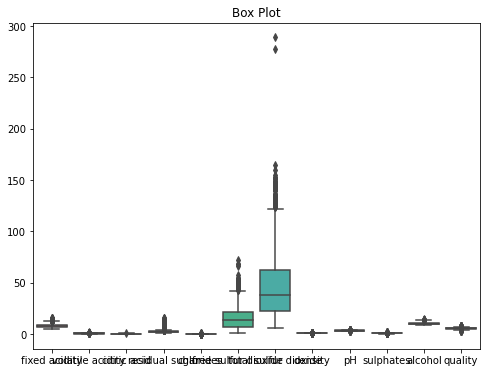

In [97]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, orient='v')
plt.title("Box Plot")
plt.show()


In [29]:
X= df.drop('quality',axis=1)

In [30]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Label Binarization

In [33]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0 )

In [34]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Train and Test Split

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state = 3)

In [73]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


## Model Training
# Random Forest Classifier

In [74]:
model = RandomForestClassifier()
 

In [75]:
model.fit(X_train,Y_train)

RandomForestClassifier()

## Model Prediction 
## Accuracy Score

In [76]:
 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [77]:
print(test_data_accuracy)

0.921875


## Binding a Predictive System

In [91]:
input_data=(7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)
# changing the input data of numpy array
input_data_as_numpyarray = np.asarray(input_data)
input_data_reshape = input_data_as_numpyarray.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)

[1]


C:\Users\Tapas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
